# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle files:
  <ul>
    <li>As requested in Q2.a and Q3.a</li>
  </ul>
</li>
<li> PY file:
  <ul>
   <li> As requested in Q3.a</li>
   </ul>
   </li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:

$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$ \frac{\partial softmax(x)_i}{\partial x_k} = \frac{\partial }{\partial x_k} (\frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}})= $$
$$ = (\frac{\partial }{\partial x_k} e^{x_i}) \cdot \frac{1}{\sum_{j=1}^{N} e^{x_j}} + e^{x_i}(\frac{\partial }{\partial x_k} \frac{1}{\sum_{j=1}^{N} e^{x_j}})= $$
$$ = \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}} \cdot I_{i=k} - \frac{e^{x_i}e^{x_k}}{(\sum_{j=1}^{N} e^{x_j})^2}= $$
$$ = \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}} \cdot I_{i=k} - \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \cdot \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}= $$
$$ = softmax(x)_k \cdot I_{i=k} - softmax(x)_i \cdot softmax(x)_k= $$
$$ = softmax(x)_k (I_{i=k} - softmax(x)_i) $$

## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes. 

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = ( \frac{\partial CE(y, \hat{y})}{\partial\theta _1} , \frac{\partial CE(y, \hat{y})}{\partial\theta _2} , ... , \frac{\partial CE(y, \hat{y})}{\partial\theta _N} ) $$
$$ \Downarrow $$
$$ \frac{\partial CE(y, \hat{y})}{\partial\theta _k} = \frac{\partial CE(y, \hat{y})}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial\theta _k} = $$
$$ \sum_{i=1}^{N} \frac{\partial CE(y, \hat{y})}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial\theta _k} = $$
$$ \sum_{i=1}^{N} (- \frac{y_i}{\hat{y}_i} \cdot \hat{y}_k (I_{i=k} - \hat{y}_i) ) = $$
$$ \sum_{i=1}^{N} (- y_i I_{i=k} + y_i \hat{y}_k ) = $$
$$ - y_k + (\sum_{i=1}^{N} y_i) \hat{y}_k = $$
$$ - y_k + 1 \cdot \hat{y}_k = \hat{y}_k - y_k $$
$$ \Downarrow $$
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = ( \hat{y}_1 - y_1 , \hat{y}_2 - y_2 , ... , \hat{y}_N - y_N ) = \hat{y} - y $$

# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [31]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [32]:
def d_sigmoid(x):
    return torch.exp(-x) / (1 + torch.exp(-x))**2


def d_tanh(x):
    return 1 - tanh(x)**2


def d_softmax(x):
    s = softmax(x)
    s = s.unsqueeze(-1)  # Adds a dimension
    i_equal_k_case = torch.diag_embed(s)
    return i_equal_k_case - torch.matmul(s, s.transpose(-1, -2))

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the forward and backward passes of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [33]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Lambda(lambda x: x.view(-1))])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    y_hat = torch.clip(y_hat, 1e-9, 1 - 1e-9)
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [34]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

In [35]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1) * 0.01
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr


    def forward(self, x):
        self.z1 = torch.matmul(x, self.W1) + self.b1
        self.s1 = self.activation_func(self.z1)

        self.z2 = torch.matmul(self.s1, self.W2) + self.b2
        self.s2 = softmax(self.z2)

        return self.s2


    def backward(self, x, y, y_hat):
        # Computing gradients of the loss w.r.t. W2, b2
        y = one_hot(y, self.output_size)  # Turn the label to a one-hot vector
        n = x.shape[0]
        dL_dz2 = (y_hat - y)  # As we proved in the first question, derivative of CE with softmax is y_hat - y.
        dz2_dW2 = self.s1  # Because z2 = s1 * W2 + b2
        dL_dW2 = torch.matmul(dz2_dW2.T, dL_dz2) / n  # Chain rule: dL_dW2 = dL_dz2 * dz2_dW2. Also normalizing by batch size.
        dL_db2 = dL_dz2.sum(axis=0) / n  # Chain rule: dL_db2 = dL_dz2 * dz2_db2, normalizing by batch size.

        # Computing gradients of the loss w.r.t. W1, b1
        dz2_ds1 = self.W2
        dL_ds1 = torch.matmul(dL_dz2, dz2_ds1.T)  # Chain rule: dL_ds1 = dL_dz2 * dz2_ds1
        ds1_dz1 = d_sigmoid(self.z1)
        dL_dz1 = dL_ds1 * ds1_dz1  # Chain rule
        dz1_dW1 = x
        dL_dW1 = torch.matmul(dz1_dW1.T, dL_dz1) / n
        dL_db1 = dL_dz1.sum(axis=0) / n

        # Updating weights
        self.W2 -= self.lr * dL_dW2
        self.b2 -= self.lr * dL_db2
        self.W1 -= self.lr * dL_dW1
        self.b1 -= self.lr * dL_db1

    def train(self, train_dataloader):
        total_loss, num_correct_predictions = 0, 0
        for x, y in train_dataloader:
            x = x.view(x.size(0), -1)
            y_hat = self.forward(x)
            loss = cross_entropy(y, y_hat)
            total_loss += loss.item()
            num_correct_predictions += torch.sum(torch.argmax(y_hat, dim=-1) == y).item()
            
            self.backward(x, y, y_hat)
        return total_loss, num_correct_predictions
    
    def eval(self, test_dataloader):
        total_loss, num_correct_predictions = 0, 0
        with torch.no_grad():
            for x, y in test_dataloader:
                x = x.view(x.size(0), -1)
                y_hat = self.forward(x)
                loss = cross_entropy(y, y_hat)
                total_loss += loss.item()
                num_correct_predictions += torch.sum(torch.argmax(y_hat, dim=-1) == y).item()
        return total_loss, num_correct_predictions

In [36]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [37]:
training_loss, test_loss, training_accuracy, test_accuracy = list(), list(), list(), list()
for epoch in range(EPOCHS):
    # First stage: Training
    total_loss, num_correct_predictions = model.train(train_dataloader)
    training_loss.append(total_loss / len(train_dataloader))
    training_accuracy.append(num_correct_predictions / len(train_dataset))

    # Second stage: Testing
    total_loss, num_correct_predictions = model.eval(test_dataloader)
    test_loss.append(total_loss / len(test_dataloader))
    test_accuracy.append(num_correct_predictions / len(test_dataset))

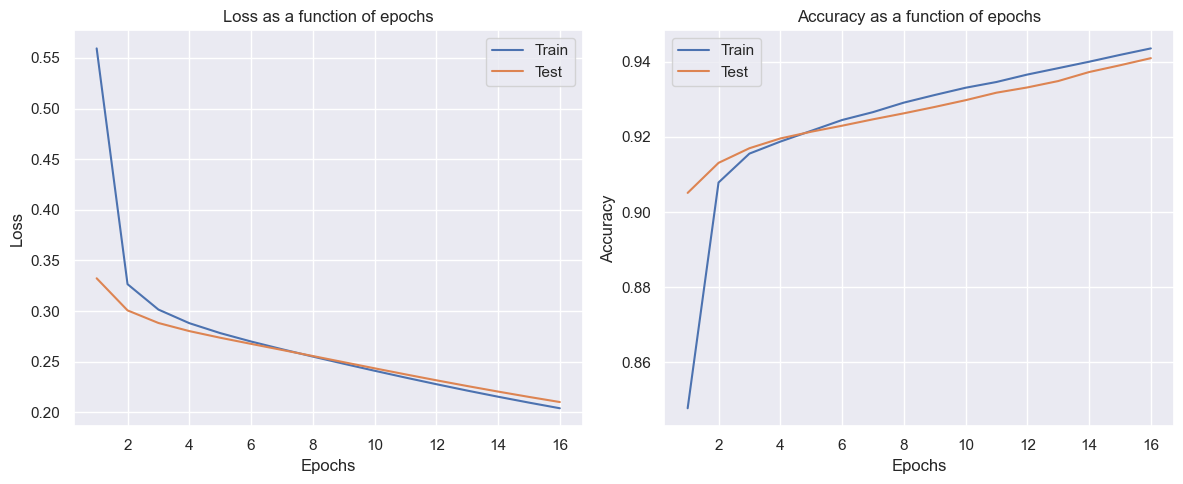

In [38]:
# Plot losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), training_loss, label='Train')
plt.plot(range(1, EPOCHS + 1), test_loss, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss as a function of epochs')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), training_accuracy, label='Train')
plt.plot(range(1, EPOCHS + 1), test_accuracy, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of epochs')
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
students_ids = "319044434_314779166"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

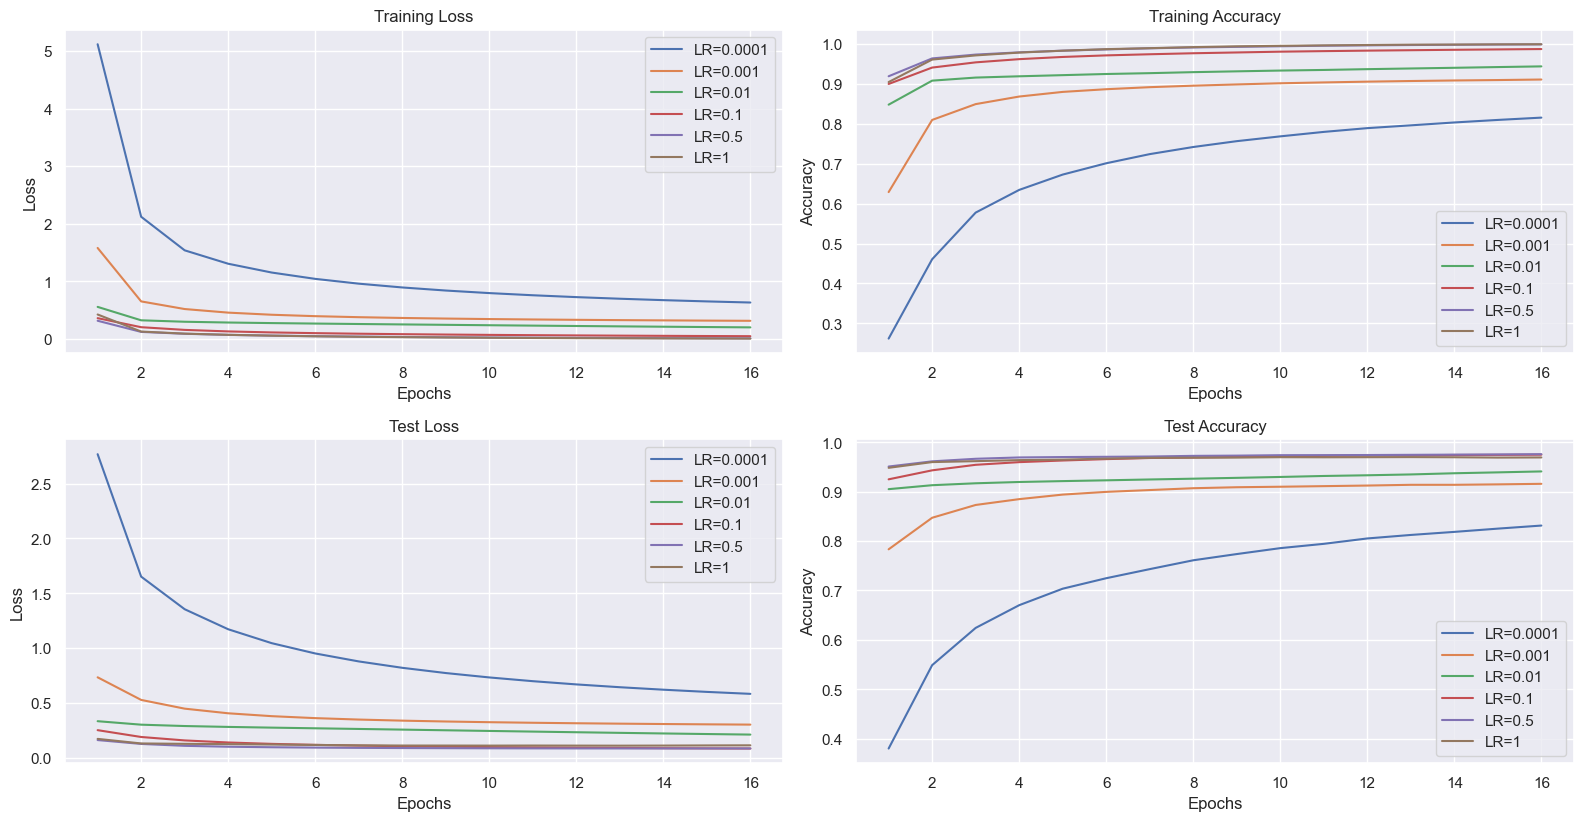

In [40]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
results = {}

for lr in learning_rates:
    set_seed(SEED)
    model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=lr)

    # Train and evaluate
    training_loss, test_loss, training_accuracy, test_accuracy = list(), list(), list(), list()
    for epoch in range(EPOCHS):
        # First stage: Training
        total_loss, num_correct_predictions = model.train(train_dataloader)
        training_loss.append(total_loss / len(train_dataloader))
        training_accuracy.append(num_correct_predictions / len(train_dataset))

        # Second stage: Testing
        total_loss, num_correct_predictions = model.eval(test_dataloader)
        test_loss.append(total_loss / len(test_dataloader))
        test_accuracy.append(num_correct_predictions / len(test_dataset))

    # Store results
    results[lr] = {
        "train_loss": training_loss,
        "test_loss": test_loss,
        "train_acc": training_accuracy,
        "test_acc": test_accuracy
    }

# Plot results
plt.figure(figsize=(16, 12))

for idx, lr in enumerate(learning_rates):
    # Training loss
    plt.subplot(3, 2, 1)
    plt.plot(range(1, EPOCHS + 1), results[lr]["train_loss"], label=f"LR={lr}")
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Training accuracy
    plt.subplot(3, 2, 2)
    plt.plot(range(1, EPOCHS + 1), results[lr]["train_acc"], label=f"LR={lr}")
    plt.title("Training Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Testing loss
    plt.subplot(3, 2, 3)
    plt.plot(range(1, EPOCHS + 1), results[lr]["test_loss"], label=f"LR={lr}")
    plt.title("Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Testing accuracy
    plt.subplot(3, 2, 4)
    plt.plot(range(1, EPOCHS + 1), results[lr]["test_acc"], label=f"LR={lr}")
    plt.title("Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()

The learning rates affect the convergence:
- A higher lr will descend faster and be able to escape local min. However, it may have hasteful "jumps" and might move back and forth without finding the optimum (divergence).
- A lower lr will descend slowly and steadily. However, it might get stuck in a local minima. Also, the number of epochs required for convergence is greater.
- Our go-to lr is somewhere in between, 0.01, because it has some stability yet it doesn't take too long to converge, in our opinion.

The graphs above support these claims.
- We can see that a low lr, 0.0001, takes a lot of epochs to achive high accuracy and a small loss.
- As the lr increases, we're achieving better accuracy and loss in less epochs.
- However, looking at the 2 highest lrs, 0.5 and 1, we can see a clear over-fitting: at train time, lr=1 has the same accuracy and loss levels as lr=0.5 and lr=0.01, but on test time it has inferior results to them both.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> As you might know, there are many dogs on campus. Sometimes, understanding the emotions of a dog can be challenging, and people might mistakenly try to pet it when it is sad or angry. As a data scientist, you have been asked to assist Technion's students. Your task is to create a "dog emotion classifier.
<br>
Your code should meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
To satisfy your boss, your model must achieve at least 70% accuracy on the test set. Your boss also emphasized that the model will be deployed on smartphones, so it should have a small number of parameters. 25% of your grade for this task will be based on the number of parameters your model uses — fewer parameters will yield a higher grade.</p>

#### Stages
<ol style="font-size: 17px"> 
<li>Perform a short EDA (Exploratory Data Analysis).</li>
 <li>Train the model and plot its accuracy and loss (for both the training and validation sets) as a function of the epochs.</li>
  <li>Report the test set accuracy.</li>
   <li>Discuss the progress you made and describe your final model.</li>
    </ol>
<br>
 Your data is in <code>hw1_data/dog_emotion</code>.
<br>
You can define a custom dataset (as in tutorial 3) or use <code>torchvision.datasets.ImageFolder</code>.

 #### Submission
 <p style="font-size: 17px"> In addition to the code in the notebook, you should submit:
<ul style="font-size: 17px">
<li> a <code>.py</code> file containing your model class.</li>
<li> a <code>.pkl</code> file containing the weight of your model</li>
</ul>

Class distribution in Train: {'angry': 700, 'happy': 700, 'relaxed': 700, 'sad': 700}
Class distribution in Validation: {'angry': 100, 'happy': 100, 'relaxed': 100, 'sad': 100}
Class distribution in Test: {'angry': 200, 'happy': 200, 'relaxed': 200, 'sad': 200}


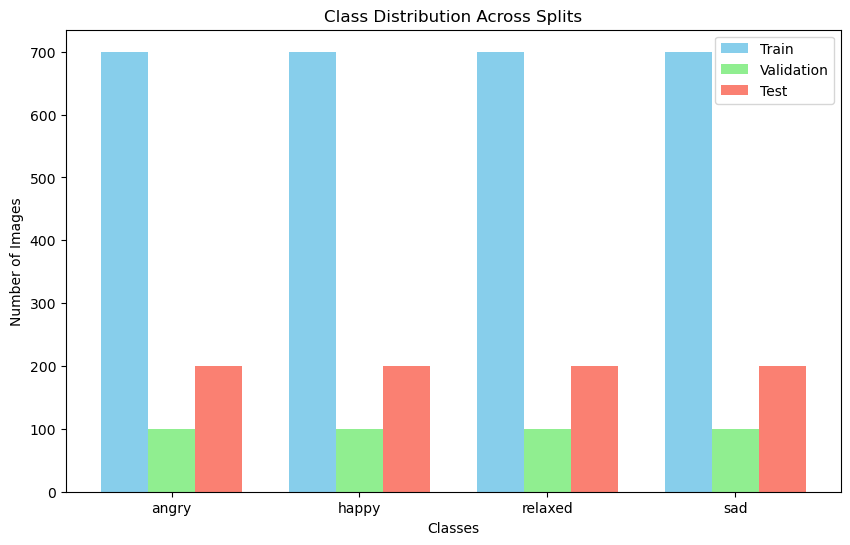

Example images from each class:


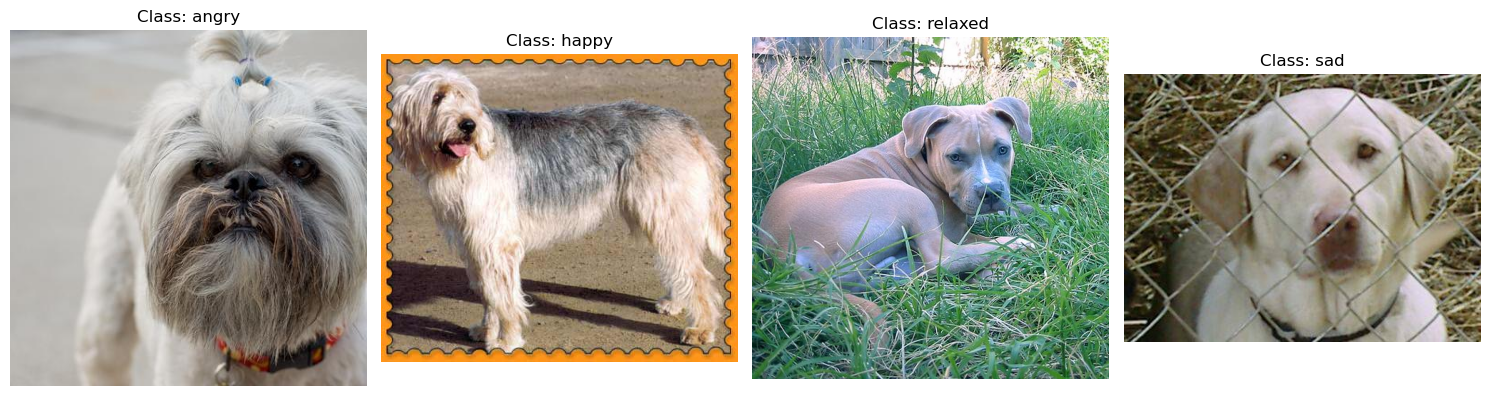

Train set: No corrupted images found.
Validation set: No corrupted images found.
Test set: No corrupted images found.
Analyzing pixel intensity distributions...


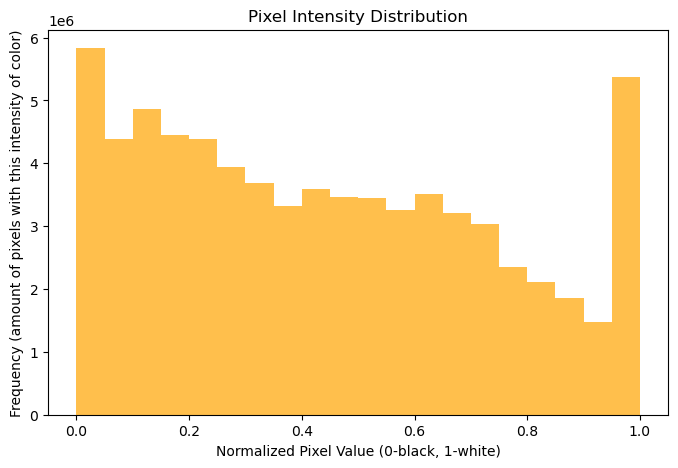

In [4]:
import os
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms
from collections import Counter
from PIL import Image
import numpy as np

# Paths to dataset
DATA_DIR = "./hw1_data/Dog_Emotion/"

# Transformation for loading images
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load datasets
train_dataset = ImageFolder(root=os.path.join(DATA_DIR, "train"), transform=transform)
val_dataset = ImageFolder(root=os.path.join(DATA_DIR, "val"), transform=transform)
test_dataset = ImageFolder(root=os.path.join(DATA_DIR, "test"), transform=transform)

# Function to count images in each class
def count_images(dataset):
    counter = Counter([label for _, label in dataset])
    return {train_dataset.classes[label]: count for label, count in counter.items()}

# Count images in each split
train_counts = count_images(train_dataset)
val_counts = count_images(val_dataset)
test_counts = count_images(test_dataset)

# Print class distributions
print("Class distribution in Train:", train_counts)
print("Class distribution in Validation:", val_counts)
print("Class distribution in Test:", test_counts)

# Combined plot for class distributions
def plot_combined_class_distribution(train_counts, val_counts, test_counts):
    classes = list(train_counts.keys())
    x = np.arange(len(classes))
    width = 0.25

    train_values = [train_counts[cls] for cls in classes]
    val_values = [val_counts[cls] for cls in classes]
    test_values = [test_counts[cls] for cls in classes]

    plt.figure(figsize=(10, 6))
    plt.bar(x - width, train_values, width, label='Train', color='skyblue')
    plt.bar(x, val_values, width, label='Validation', color='lightgreen')
    plt.bar(x + width, test_values, width, label='Test', color='salmon')

    plt.title("Class Distribution Across Splits")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(x, classes)
    plt.legend()
    plt.show()

plot_combined_class_distribution(train_counts, val_counts, test_counts)

# Inspect one example image per class
def inspect_example_images(dataset):
    print("Example images from each class:")
    fig, axs = plt.subplots(1, len(dataset.classes), figsize=(15, 5))

    for cls_idx, cls_name in enumerate(dataset.classes):
        for img_path, label in dataset.imgs:
            if label == cls_idx:
                img = Image.open(img_path)
                axs[cls_idx].imshow(img)
                axs[cls_idx].set_title(f"Class: {cls_name}")
                axs[cls_idx].axis('off')
                break

    plt.tight_layout()
    plt.show()

inspect_example_images(train_dataset)

# Check for corrupted images
def check_corrupted_images(dataset, set_name):
    corrupted = []
    for i, (path, _) in enumerate(dataset.imgs):
        try:
            img = Image.open(path)
            img.verify()  # Verify if the image is not corrupted
        except (IOError, SyntaxError) as e:
            corrupted.append(path)
    if corrupted:
        print(f"{set_name} set: corrupted images are {corrupted}")
    else:
        print(f"{set_name} set: No corrupted images found.")

check_corrupted_images(train_dataset, "Train")
check_corrupted_images(val_dataset, "Validation")
check_corrupted_images(test_dataset, "Test")

# Optional: Analyze pixel intensity distributions
def analyze_pixel_intensity(dataset, num_samples=100):
    print("Analyzing pixel intensity distributions...")
    intensities = []
    for i in range(min(num_samples, len(dataset))):
        img, _ = dataset[i]
        intensities.append(img.numpy().flatten())
    intensities = np.concatenate(intensities)
    
    plt.figure(figsize=(8, 5))
    plt.hist(intensities, bins=20, color='orange', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Normalized Pixel Value (0-black, 1-white)")
    plt.ylabel("Frequency (amount of pixels with this intensity of color)")
    plt.show()

analyze_pixel_intensity(train_dataset)


In [5]:
import os
from PIL import Image, ImageEnhance, ImageFilter
import torchvision.transforms.functional as F
import random

def augment_dataset(input_dir, output_dir):
    """
    Augment the entire dataset by applying additional augmentations like cropping, scaling,
    brightness adjustments, and Gaussian blur.

    Args:
    - input_dir (str): Path to the original dataset directory.
    - output_dir (str): Path to save the augmented dataset.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for label in os.listdir(input_dir):
        input_label_dir = os.path.join(input_dir, label)
        output_label_dir = os.path.join(output_dir, label)
        os.makedirs(output_label_dir, exist_ok=True)

        for img_name in os.listdir(input_label_dir):
            if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Ensure valid image files
                img_path = os.path.join(input_label_dir, img_name)
                img = Image.open(img_path).convert("RGB")

                # Apply augmentations
                apply_additional_augmentations(img, output_label_dir, img_name)

def apply_additional_augmentations(image, output_label_dir, base_name):
    """
    Apply additional augmentations such as brightness, contrast, random cropping, and blurring.

    Args:
    - image (PIL.Image.Image): Input image to augment.
    - output_label_dir (str): Directory to save augmented images.
    - base_name (str): Base name of the original image.
    """
    # Save the original image
    image.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_original.jpg"))

    # Random cropping
    for i in range(2):  # Create two cropped versions
        cropped_img = F.resized_crop(
            image,
            top=random.randint(0, 10),  # Random crop positions
            left=random.randint(0, 10),
            height=image.height - 10,
            width=image.width - 10,
            size=(image.height, image.width)
        )
        cropped_img.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_crop{i}.jpg"))

    # Brightness/contrast adjustments
    for i in range(2):  # Create two brightness/contrast adjusted versions
        enhancer = ImageEnhance.Brightness(image)
        brightness_adjusted = enhancer.enhance(random.uniform(0.7, 1.3))  # Random brightness adjustment
        brightness_adjusted.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_bright{i}.jpg"))

        enhancer = ImageEnhance.Contrast(image)
        contrast_adjusted = enhancer.enhance(random.uniform(0.7, 1.3))  # Random contrast adjustment
        contrast_adjusted.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_contrast{i}.jpg"))

    # Gaussian blur
    blurred_img = image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 2.0)))
    blurred_img.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_blur.jpg"))

    # Scaling
    for i in range(2):  # Create two scaled versions
        scale_factor = random.uniform(0.8, 1.2)
        scaled_img = F.resize(image, [int(image.height * scale_factor), int(image.width * scale_factor)])
        scaled_img.save(os.path.join(output_label_dir, f"{base_name.split('.')[0]}_scale{i}.jpg"))

# Paths for the original and augmented datasets
train_dir = os.path.join(DATA_DIR, 'train/')
augmented_train_dir = os.path.join(DATA_DIR, 'augmented_train/')

augment_dataset(train_dir, augmented_train_dir)

print("Augmentation complete. Augmented images saved to:", augmented_train_dir)


KeyboardInterrupt: 

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import pandas as pd
import os
import numpy as np
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
""" Data Preparation with Transformations """

transform_train = transforms.Compose([
    transforms.Resize((128, 128)),  # Ensure all images are resized to 128x128
    transforms.RandomResizedCrop((128,128), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_valtest = transforms.Compose([
    transforms.Resize((128, 128)),  # Ensure all images are resized to 48x48
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = dsets.ImageFolder(root=augmented_train_dir, transform=transform_train)
val_dataset = dsets.ImageFolder(root=os.path.join(DATA_DIR, "val/"), transform=transform_valtest)
test_dataset = dsets.ImageFolder(root=os.path.join(DATA_DIR, "test/"), transform=transform_valtest)

# Data loaders
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 27, kernel_size=5, padding=2),  # Output: (27, 128, 128)
            nn.BatchNorm2d(27),
            nn.PReLU(num_parameters=27),
            nn.MaxPool2d(kernel_size=2)                 # Output: (27, 64, 64)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(27, 54, kernel_size=3, padding=1), # Output: (54, 64, 64)
            nn.BatchNorm2d(54),
            nn.PReLU(num_parameters=54),
            nn.MaxPool2d(kernel_size=2)                 # Output: (54, 32, 32)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(54, 81, kernel_size=3, padding=1), # Output: (81, 32, 32)
            nn.BatchNorm2d(81),
            nn.PReLU(num_parameters=81),
            nn.MaxPool2d(kernel_size=2)                 # Output: (81, 16, 16)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(81, 108, kernel_size=3, padding=1), # Output: (108, 16, 16)
            nn.BatchNorm2d(108),
            nn.PReLU(num_parameters=108),
            nn.MaxPool2d(kernel_size=2)                  # Output: (108, 8, 8)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(108, 144, kernel_size=3, padding=1), # Output: (144, 8, 8)
            nn.BatchNorm2d(144),
            nn.PReLU(num_parameters=144),
            nn.MaxPool2d(kernel_size=2)                   # Output: (144, 4, 4)
        )

        # Fully connected layer
        self.fc = nn.Sequential(
            nn.Flatten(),                                 # Flatten the feature map
            nn.Dropout(p=0.5),
            nn.Linear(144 * 4 * 4, 512),                 # Adjust input size based on final feature map
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, num_classes)                  # Output layer for 4 classes
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.fc(out)
        return out


In [ ]:
import torch.optim as optim

if torch.cuda.is_available():
    cnn = cnn.cuda()

#criterion = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.0001, weight_decay= 0.0002)

print('number of parameters: ', sum(param.numel() for param in cnn.parameters()))

In [ ]:
a = torch.rand(3, 3).to("cuda" if torch.cuda.is_available() else "cpu")
print(f"Tensor is on: {a.device}")

In [ ]:
Cnn = CNN()

In [ ]:
""" Training Function """

def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track metrics
            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct_train += predicted.eq(labels).sum().item()
            total_train += labels.size(0)

        train_epoch_loss = running_loss / total_train
        train_epoch_acc = 100.0 * correct_train / total_train
        train_loss_history.append(train_epoch_loss)
        train_acc_history.append(train_epoch_acc)

        # Validation phase
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * images.size(0)
                _, predicted = outputs.max(1)
                correct_val += predicted.eq(labels).sum().item()
                total_val += labels.size(0)

        val_epoch_loss = running_val_loss / total_val
        val_epoch_acc = 100.0 * correct_val / total_val
        val_loss_history.append(val_epoch_loss)
        val_acc_history.append(val_epoch_acc)

        # Print epoch results
        print(f"Epoch [{epoch+1}/{num_epochs}]",
              f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_acc:.2f}% |",
              f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%")

    return {
        'train_loss': train_loss_history,
        'train_acc': train_acc_history,
        'val_loss': val_loss_history,
        'val_acc': val_acc_history
    }


""" Train the Model """

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
history = train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=30)

In [ ]:
import pickle

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Test set evaluation
model.eval()
correct_test, total_test = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save model weights
model_file = "dog_emotion_classifier_2.pkl"
with open(model_file, "wb") as f:
    pickle.dump(model.state_dict(), f)

print(f"Model weights saved to {model_file}")

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()


## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the <code>hw1_data/birds</code> folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the <code>hw1_data/dogs</code> folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot their response (their output) for the image from section 5. Explain what do you see.

In [29]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import json

torchvision.models.vgg16(pretrained=True, progress=True)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

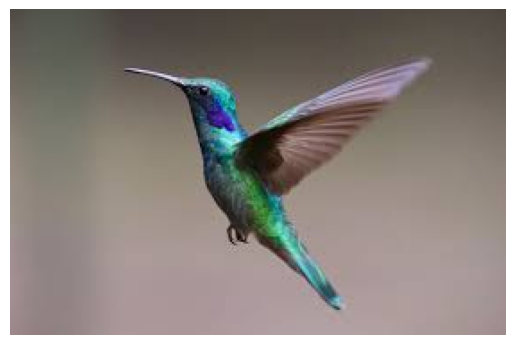

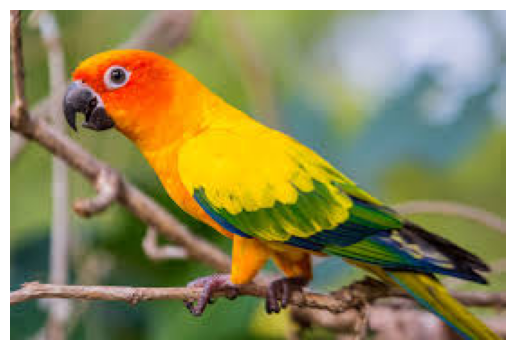

~~  First output:  ~~
Output shape:  torch.Size([1, 1000])
Predicted class: hummingbird
~~  Second output:  ~~
Output shape:  torch.Size([1, 1000])
Predicted class: lorikeet


In [30]:
bird_images_dir = './hw1_data/birds/'
bird_images = [img for img in os.listdir(bird_images_dir)]

def display_bird_image(image):
    # Display the bird image
    img_path = os.path.join(bird_images_dir, image)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

for image in bird_images:
    display_bird_image(image)

# Define the transformation
preprocess = transforms.Compose([
    transforms.Resize(256),  # Resize to 256x256 to maintain aspect ratio
    transforms.CenterCrop(224),  # Crop to 224x224
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

bird_outputs = list()
for img_name in bird_images:
    img_path = os.path.join(bird_images_dir, img_name)
    image = Image.open(img_path)
    
    # Apply the pre-processing transformation
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
    
    # Feed the image to the model
    with torch.no_grad():
        output = model(input_batch)
    
    bird_outputs.append(output)

def print_output(title, output):
    print("~~ ", title, " ~~")
    print("Output shape: ", output.shape)  # Tensor of shape (1, 1000), containing scores for each of the 1000 ImageNet classes

    # Load the ImageNet class index JSON file
    with open('./hw1_data/imagenet_class_index.json', 'r') as f:
        class_idx = json.load(f)

    # Get the predicted class index from the output tensor
    _, predicted_idx = torch.max(output, 1)
    predicted_idx = predicted_idx.item()

    # Find the class label for the predicted index
    class_label = class_idx[str(predicted_idx)][1]
    print(f"Predicted class: {class_label}")

print_output("First output:", bird_outputs[0])
print_output("Second output:", bird_outputs[1])

We took the following steps when pre-processing the bird data:    
- Resizing the images to 256x256
- The VGG expects the shape 3x224x224, so we cropped the images.
- Normalized the images as required.    

The output is a tensor of shape (1, 1000), containing scores for each of the 1000 ImageNet classes.

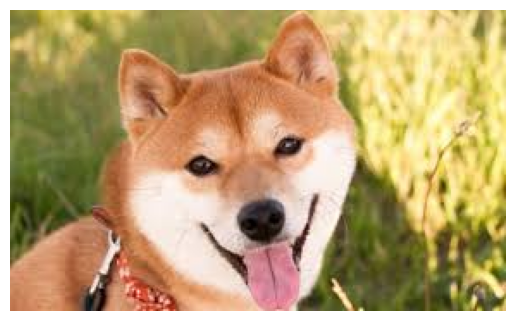

~~  Dog image output:  ~~
Output shape:  torch.Size([1, 1000])
Predicted class: dingo


In [31]:
dog_images_dir = './hw1_data/dogs/'
dog_image_path = os.path.join(dog_images_dir, random.choice(os.listdir(dog_images_dir)))
dog_img = Image.open(dog_image_path)

# Display the dog image
plt.imshow(dog_img)
plt.axis('off')
plt.show()

# Preprocess the dog image
dog_input_tensor = preprocess(dog_img)
dog_input_batch = dog_input_tensor.unsqueeze(0)

# Feed the dog image to the model
with torch.no_grad():
    dog_output = model(dog_input_batch)

print_output("Dog image output:", dog_output)

The output is a tensor of shape (1, 1000), containing scores for each of the 1000 ImageNet classes.

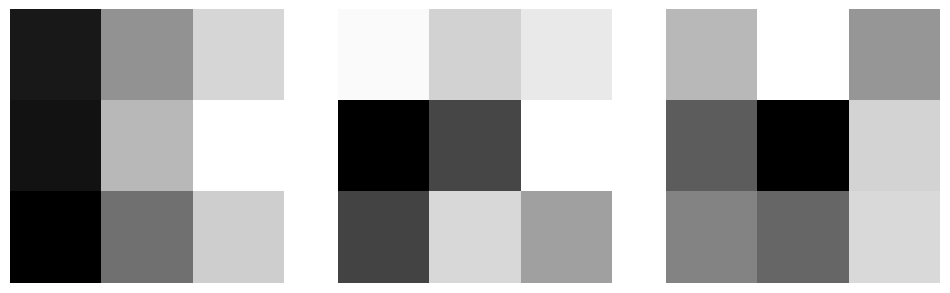

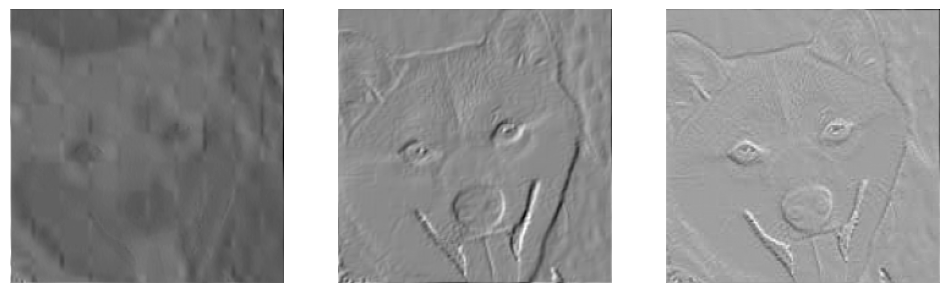

In [32]:
# Get the first convolutional layer from the model
first_conv_layer = model.features[0]

# Extract the first 3 filters (weights) from the first convolutional layer
filters = first_conv_layer.weight.data.cpu().numpy()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(filters[i, 0, :, :], cmap='gray')  # Display the filter as a 2D image
    axes[i].axis('off')
plt.show()

# Feeding the image to the first layer
first_conv_output = first_conv_layer(dog_input_batch)

# Plot the output response for the first 3 filters
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(first_conv_output[0, i].cpu().detach().numpy(), cmap='gray')  # Display the response for each filter
    axes[i].axis('off')
plt.show()

The output has shape (1, 64, 224, 224), while 64 is the number of output channels.    
Looking at the first feature maps, we see they captured simple patterns and textures. Also, we note that more advance the filter is, it recognizes complex patterns better. This plot visualizes how each filter detects other aspects of the image.